Last week we discussed Pandas Arrays and did a tutorial using MOS data.

This week we will be further advancing our data analysis toolset using xarrays and a couple packages in python.

Xarrays are a special type of data array that builds off of pandas. If you recall, in pandas we had series and DataFrames. Both of these had labels telling what the data described.

Xarrays are similar in that aspect, but take it a step further. Xarrays contain information on data that tells its attributes, coordinates, and dimensions.

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 26, latitude: 181, longitude: 360)
Coordinates:
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
  * isobaricInhPa  (isobaricInhPa) int64 1000 975 950 925 900 ... 70 50 30 20 10
  * latitude       (latitude) float64 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude      (longitude) float64 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
    valid_time     datetime64[ns] ...
Data variables:
    gh             (isobaricInhPa, latitude, longitude) float32 ...
    t              (isobaricInhPa, latitude, longitude) float32 ...
    p3041          (isobaricInhPa, latitude, longitude) float32 ...
    u              (isobaricInhPa, latitude, longitude) float32 ...
    v              (isobaricInhPa, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    history:                 2019-10-09T10:48:41 GRIB to CDM+CF via cfgrib-0....


Above we have example output using a GFS grib file. Inside the xarray.Dataset we see the following fields:
    Dimensions, Coordinates, Data Variables, and Attributes
        
        Dimensions: Tells the size of each array within the datset. In the above case, each variable has an array   that is (26,181,360), where the first dimension is "isobaricInhPa", the second is "latitude", and the third is "longitude"
        
        Coordinates: Coordinates tell the values of each dimension. If we are looking at lat/lon data, it will give the lat/lons on which the data is located. In the above case, we have descriptions of the "isobaricInhPa" levels, the latitudes, and the longitudes.
        
        Data Variables: The variables we have to work with in the dataset. In the above case, we have 5 variables: gh, t, p3041, u, and v.
        
        Attributes: Tells us any additional information about the data/file where the data comes from. In the above case, it tells us what kind of file we have (GRIB) and who made it (NCEP).
        
So first, we need to install xarray and its dependencies:
        conda install xarray dask netCDF4 bottleneck

Now let's make our first DataArray!

In [14]:
#We can make a DataArray using a numpy array
import numpy as np
import pandas as pd
import xarray as xr

data = xr.DataArray(np.random.randn(3,3,3),dims=('x','y','z'),coords = {'x':[10,20,30],'y':[20,10,40]})
data

<xarray.DataArray (x: 3, y: 3, z: 3)>
array([[[-0.865127, -0.050115, -0.494585],
        [-0.443289,  0.244609, -1.183241],
        [-1.43774 , -0.456528,  1.751974]],

       [[-0.770416,  0.772736,  0.288029],
        [-1.464285, -0.057972, -1.107126],
        [-1.007359, -0.214168, -0.016348]],

       [[ 1.029555,  1.374248,  0.092549],
        [ 0.3917  ,  0.641365, -2.172593],
        [-1.186265,  0.932269,  0.872048]]])
Coordinates:
  * x        (x) int32 10 20 30
  * y        (y) int32 20 10 40
Dimensions without coordinates: z

We see from the above output that the DataArray has 3 dimensions, (x,y,and z) and x and y have coordinates, while z does not.

We can also create a DataArray from a pandas DataFrame or Series and it will copy everything over

In [15]:
#Create DataArray from Pandas Series
data_pd = xr.DataArray(pd.Series(range(3), index=list('abc'), name='foo'))
data_pd

<xarray.DataArray 'foo' (dim_0: 3)>
array([0, 1, 2], dtype=int64)
Coordinates:
  * dim_0    (dim_0) object 'a' 'b' 'c'

In [16]:
#We can access the data in the DataArray in many ways
print('Values from the DataArray')
print(data.values)
print('')

print('Dimensions from the DataArray')
print(data.dims)
print('')

print('Coordinates from the DataArray')
print(data.coords)
print('')

print('Attributes from the DataArray')
print(data.attrs)

Values from the DataArray
[[[-0.86512664 -0.05011545 -0.49458517]
  [-0.44328861  0.2446093  -1.18324129]
  [-1.43774006 -0.4565282   1.75197407]]

 [[-0.77041568  0.77273591  0.28802921]
  [-1.46428457 -0.05797201 -1.10712609]
  [-1.00735923 -0.21416841 -0.01634848]]

 [[ 1.02955484  1.37424842  0.09254923]
  [ 0.3917005   0.64136472 -2.17259284]
  [-1.18626504  0.93226932  0.87204823]]]

Dimensions from the DataArray
('x', 'y', 'z')

Coordinates from the DataArray
Coordinates:
  * x        (x) int32 10 20 30
  * y        (y) int32 20 10 40

Attributes from the DataArray
OrderedDict()


Now we know how to make a DataArray and access the contents within it! Now let's start working with real data! 

We will be using the 2004041400.nc file for the rest of this example and then the air.mon.mean.nc file we used a couple weeks ago.

In [17]:
#To import the data, we use xr.open_dataset
#Note: This is a small dataset. If we wanted to use a bigger dataset or multiple data sets, python will give us a
#memory error. To fix this, we would us xr.open_mfdataset (we won't worry about this here)

ds = xr.open_dataset('H:/gfsncfiles/2004041400.nc')
ds

<xarray.Dataset>
Dimensions:  (lat2: 71, lon2: 99)
Dimensions without coordinates: lat2, lon2
Data variables:
    lat      (lat2) float32 ...
    lon      (lon2) float32 ...
    h500     (lat2, lon2) float64 ...
    h200     (lat2, lon2) float64 ...
    h250     (lat2, lon2) float64 ...
    mslp     (lat2, lon2) float64 ...
    w750     (lat2, lon2) float64 ...
    utop     (lat2, lon2) float64 ...
    vtop     (lat2, lon2) float64 ...
    ubot     (lat2, lon2) float64 ...
    vbot     (lat2, lon2) float64 ...
    ivt      (lat2, lon2) float64 ...
Attributes:
    description:  GFS fnl data

Looking at our output file, we see there are 2 dimensions (lat2 and lon2), no coordinates on these dimensions, 12 variables, and the attribute says it is GFS fnl data.

Since we do not have coordinate data for this data set, we need to look and see if it is available as a variable. Luckily here we see that lat and lon are variables, so we can get the coordinate data from those!

Let's pull out some data from the Dataset into their own variables.

In [18]:
#Pull out the mslp, h500, lat, and lon data
#To get a variable, we just call it's name after the data array, so to get mslp we say, ds.mslp
mslp = ds.mslp
h500 = ds.h500
lat = ds.lat
lon = ds.lon

mslp

<xarray.DataArray 'mslp' (lat2: 71, lon2: 99)>
array([[1022.269928, 1022.528836, 1022.775123, ..., 1019.903799, 1019.881328,
        1019.858546],
       [1022.418432, 1022.646089, 1022.861001, ..., 1020.092411, 1020.068735,
        1020.044788],
       [1022.563693, 1022.755513, 1022.934908, ..., 1020.278513, 1020.250861,
        1020.224559],
       ...,
       [1006.862097, 1007.295451, 1007.941623, ..., 1027.878629, 1028.583214,
        1029.326725],
       [1007.571564, 1008.172512, 1008.794348, ..., 1028.304364, 1028.983262,
        1029.67128 ],
       [1008.427555, 1009.04173 , 1009.65781 , ..., 1028.717528, 1029.370651,
        1030.035297]])
Dimensions without coordinates: lat2, lon2

We now have 4 variables with DataArrays (mslp, h500, lat, lon). Each contains the data from the Dataset and the coordinates (which we don't have information for in the variable itself).

We see we have 71 latitude values and 99 longitude values. These are stored within the lat and lon DataArrays that we just created above. These will serve as our coordinate values when we want to plot.

Let's plot the data to see what we have

In [19]:
#Let's plot the mslp data
mslp.plot()

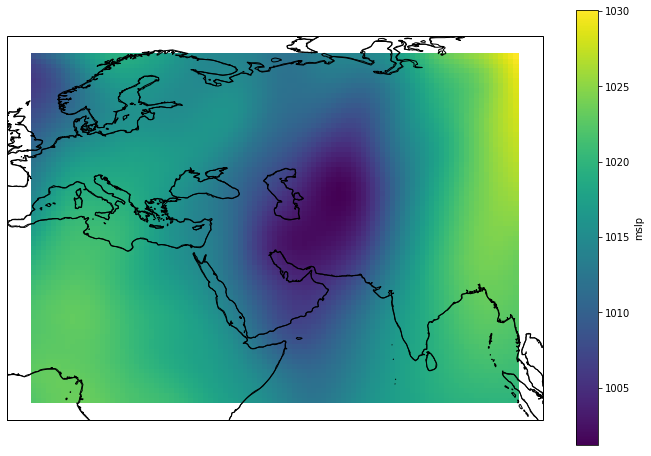

In [20]:
#This data looks good, it is plotted on the lat/lon grid, however, it would be nice to see the actual location on
#the map. Let's overlay the mslp data over a map of the world.
import cartopy.crs as crs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

plt.figure(figsize=(12,8))
ax = plt.axes(projection=crs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))
ds.mslp.plot.pcolormesh(ax=ax, transform=crs.PlateCarree());
ax.coastlines()


That's a bit better, let's compare to the lat/lons.mslp = ds.mslp

In [21]:
print(lat)
print(lon)

<xarray.DataArray 'lat' (lat2: 71)>
array([25.61226 , 25.923458, 26.234976, 26.546787, 26.85888 , 27.171246,
       27.483883, 27.796787, 28.109951, 28.423342, 28.736977, 29.05083 ,
       29.364918, 29.679201, 29.993683, 30.308365, 30.623222, 30.938257,
       31.25345 , 31.5688  , 31.8843  , 32.199932, 32.51569 , 32.831562,
       33.14754 , 33.46362 , 33.77979 , 34.09603 , 34.412342, 34.728718,
       35.04513 , 35.361588, 35.67807 , 35.994587, 36.311096, 36.627605,
       36.944103, 37.26058 , 37.57702 , 37.893425, 38.209774, 38.52605 ,
       38.842262, 39.158386, 39.47441 , 39.790333, 40.106133, 40.421814,
       40.73735 , 41.052734, 41.367966, 41.683018, 41.997894, 42.312576,
       42.627052, 42.941315, 43.25536 , 43.569157, 43.882706, 44.196   ,
       44.50902 , 44.821754, 45.134205, 45.446346, 45.75817 , 46.069675,
       46.380836, 46.69165 , 47.002106, 47.31219 , 47.621887], dtype=float32)
Dimensions without coordinates: lat2
<xarray.DataArray 'lon' (lon2: 99)>
array([-98

This isn't where the data is plotted on the map! We need to go in and fix the coordinates that are missing in the DataArray!

To do this, we will use the set_coords option. This option takes a list of the variables we want to use as coordinates, and sets them for the coordinates. We also need to rename the lat and lon DataArrays to the dimension names (lat2 and lon2). To do this, we will use the rename() function.


In [22]:
ds = ds.rename({'lat': 'lat2', 'lon':'lon2'}).set_coords(['lat2','lon2'])

In [23]:
#Now we need to regrab the data from the dataset, since we added coordinates to the dataset and not the data array
h500 = ds.h500
mslp = ds.mslp

mslp

<xarray.DataArray 'mslp' (lat2: 71, lon2: 99)>
array([[1022.269928, 1022.528836, 1022.775123, ..., 1019.903799, 1019.881328,
        1019.858546],
       [1022.418432, 1022.646089, 1022.861001, ..., 1020.092411, 1020.068735,
        1020.044788],
       [1022.563693, 1022.755513, 1022.934908, ..., 1020.278513, 1020.250861,
        1020.224559],
       ...,
       [1006.862097, 1007.295451, 1007.941623, ..., 1027.878629, 1028.583214,
        1029.326725],
       [1007.571564, 1008.172512, 1008.794348, ..., 1028.304364, 1028.983262,
        1029.67128 ],
       [1008.427555, 1009.04173 , 1009.65781 , ..., 1028.717528, 1029.370651,
        1030.035297]])
Coordinates:
  * lat2     (lat2) float32 25.61226 25.923458 26.234976 ... 47.31219 47.621887
  * lon2     (lon2) float32 -98.86447 -98.518524 ... -64.5235 -64.17755

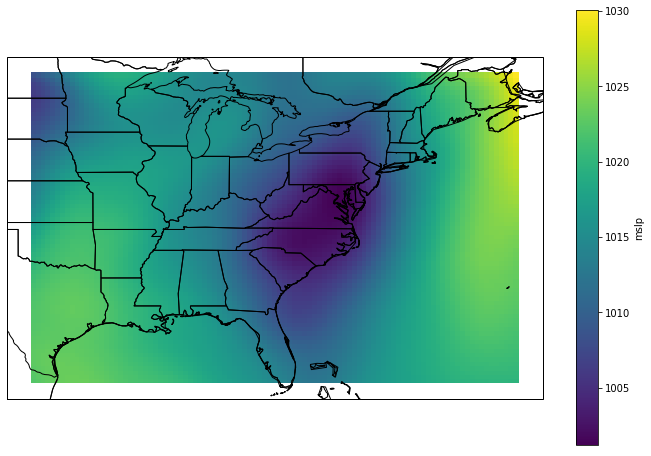

In [24]:
#Now we have coordinates with our data! Let's try that plot again
plt.figure(figsize=(12,8))
ax = plt.axes(projection=crs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))
ds.mslp.plot.pcolormesh(ax=ax, transform=crs.PlateCarree());
ax.coastlines()

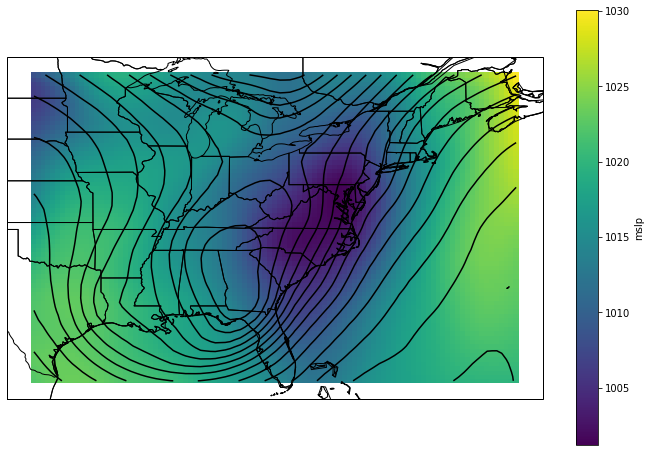

In [25]:
#That looks much better with the data in the right spot! Now let's add the 500 hPa heights to the graph!
#We will shade mslp and contour the 500 hPa heights

plt.figure(figsize=(12,8))
ax = plt.axes(projection=crs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))
ds.mslp.plot.pcolormesh(ax=ax,transform=crs.PlateCarree())
ds.h500.plot.contour(ax=ax,levels=20, transform=crs.PlateCarree(),colors='black')
ax.coastlines()

Now we have learned how to import data from a netcdf file, add coordinates to the data and plot it!

Next, we will work with the air.mon.mean.nc data to see how we can manipulate data with xarrays.

In [26]:
ds = xr.open_dataset("H:/air.mon.mean.nc")
ds

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 861)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2019-09-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

Here we see that we have 3 dimensions (lat, lon, and time), 3 coordinates corresponding to each of the dimensions, and one variable (air).

Let's look at the air data

In [27]:
tair = ds.air
tair

<xarray.DataArray 'air' (time: 861, lat: 73, lon: 144)>
[9050832 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2019-09-01
Attributes:
    long_name:     Monthly Mean Air Temperature at sigma level 0.995
    valid_range:   [-2000.  2000.]
    units:         degC
    precision:     1
    var_desc:      Air Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Obs
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-73.78001  42.14595]

In [28]:
#We see that we have 860 times, 73 lats and 144 lons. The times range from Jan 1, 1948 to Aug 1, 2019. The lats
#go from the North pole to the South pole and the lons go from 0 to 360.

#Let's try to plot the data to visualize it NOTE: This will error out

tair.plot.pcolormesh()

ValueError: DataArray must be 2d

In [ ]:
#We see that it needs a 2d array, we have 3 dimensions! So let's pick one time from the first dimension
tair[0,:,:].plot.pcolormesh()

That looks good! We see the temperatures plotted where we would expect them to be.

Notice that we had to pick a time. The data is organized by month and year for the time period from 1/1/1948-8/1/2019. Normally, this would be a pain to work with the data since we would havea lot of trouble grouping the times together. However, xarray makes this process a lot simpler!

Xarray has a built in function called groupby. This function is similar to the one we used in pandas last week that let us group by similar values. In this case, it does the same thing! Since our time is a date time object:
                1948-02-01T00:00:00.000000000', dtype='datetime64[ns] 

It has a numerical date (year, month, and day) and a time. We can use that information to group the data however we need it. So let's group by month, day and year



In [ ]:
monthly = ds.groupby('time.month').mean('time')
daily = ds.groupby('time.day')
yearly = ds.groupby('time.year').mean('time')

print(monthly)

monthly = ds.groupby('time.month')
monthly.groups

If we look above, we see the monthly data. We took the mean of the data to make a dataset. Had we not and just left it as monthly = ds.groupby('time.month'), then we would need to access the groups by saying monthly.groups.

When accessing with monthly.groups, we will need to find the mean of the data, the sum of the data, etc to be able to work with it. So, let's take the mean of the data and then plot it by month!

In [ ]:
#First we need to grab the monthly data and find the mean of each month for all years
monthly_data = ds.groupby('time.month').mean('time')

#Now plot each month
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14,12))
j = 0
i = 0

#Run through the DataArray (we defined each month as a number earlier)
for x,month in enumerate((1,2,3,4,5,6,7,8,9,10,11,12)):
    monthly_data['air'].sel(month=month).plot.pcolormesh(
        ax=axes[i, j], vmin=-40, vmax=40, cmap='Spectral_r',
        add_colorbar=True, extend='both')

    axes[i, j].set_ylabel(month)
    j = j + 1
    if(j == 3):
        j = 0
        i = i + 1


for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')
    ax.set_xlabel('')

In [39]:
#Now let's clean up the code above. Let's say we wanted each month to have a name instead of a number

monthly = ds.groupby('time.month').mean('time')
monthly

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, month: 12)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    air      (month, lat, lon) float32 -30.133583 -30.133583 ... -22.14634

In [48]:
#Now we need to rename the months coordinate
months = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
monthly.coords['month'] = months

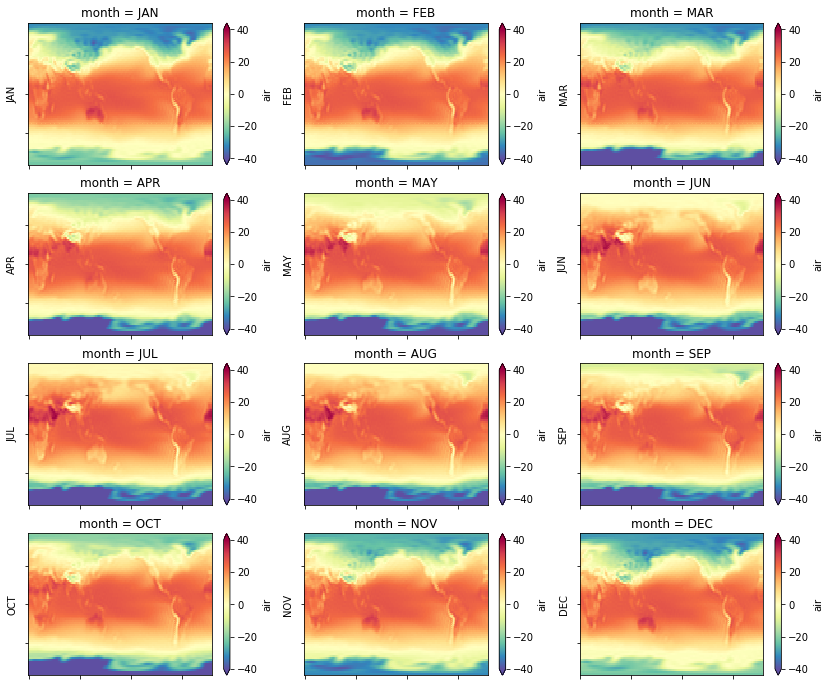

In [49]:
#Now plot each month
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14,12))
j = 0
i = 0

#Run through the DataArray (we defined each month as a number earlier)
for x,month in enumerate(('JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC')):
    monthly['air'].sel(month=month).plot.pcolormesh(
        ax=axes[i, j], vmin=-40, vmax=40, cmap='Spectral_r',
        add_colorbar=True, extend='both')

    axes[i, j].set_ylabel(month)
    j = j + 1
    if(j == 3):
        j = 0
        i = i + 1


for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')
    ax.set_xlabel('')
    

Great! Now we have the data labelled by months!

We can do this same process to split the data by year or by season! 

We will now work on the data by year to plot the average temperature for each year at a random lat/lon point!

We can do this by grouping the dataset by year, taking the mean of the dataset and then picking a single point.

In the end, we want our plotting function to look like:

    yearly.air[:,44,58].plot() (where : is all times, 44 is the lat, and 58 is the lon)

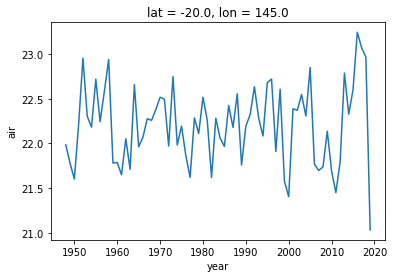

In [54]:
#Select the data by year
yearly = ds.air.groupby('time.year').mean('time')
yearly[:,44,58].plot()